In [396]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error

In [397]:
df=pd.read_csv('weatherAUS.csv',parse_dates=['Date'])

In [398]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,2009-05-18,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0
1,2009-07-03,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,99.0,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,0.0
2,2010-02-18,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2
3,2010-03-04,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0
4,2010-09-09,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,64.0,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,0.4


In [399]:
df.shape

(36881, 23)

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36881 entries, 0 to 36880
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           36881 non-null  datetime64[ns]
 1   Location       36881 non-null  object        
 2   MinTemp        36543 non-null  float64       
 3   MaxTemp        36639 non-null  float64       
 4   Rainfall       36255 non-null  float64       
 5   Evaporation    24035 non-null  float64       
 6   Sunshine       23317 non-null  float64       
 7   WindGustDir    33513 non-null  object        
 8   WindGustSpeed  33520 non-null  float64       
 9   WindDir9am     34072 non-null  object        
 10  WindDir3pm     35919 non-null  object        
 11  WindSpeed9am   36219 non-null  float64       
 12  WindSpeed3pm   36235 non-null  float64       
 13  Humidity9am    36311 non-null  float64       
 14  Humidity3pm    36370 non-null  float64       
 15  Pressure9am    3330

In [401]:
round((df.isnull().sum()/df.shape[0])*100,2)

Date              0.00
Location          0.00
MinTemp           0.92
MaxTemp           0.66
Rainfall          1.70
Evaporation      34.83
Sunshine         36.78
WindGustDir       9.13
WindGustSpeed     9.11
WindDir9am        7.62
WindDir3pm        2.61
WindSpeed9am      1.79
WindSpeed3pm      1.75
Humidity9am       1.55
Humidity3pm       1.39
Pressure9am       9.69
Pressure3pm       9.63
Cloud9am         33.89
Cloud3pm         35.20
Temp9am           1.32
Temp3pm           1.20
RainToday         1.70
RISK_MM           1.68
dtype: float64

In [402]:
null=pd.DataFrame(df.isnull().sum())

In [403]:
(null.sum()/df.shape[0])*100
# Hence we should not remove the null values

0    204.137632
dtype: float64

# Data Pre-processing

1. Removing missing values

In [404]:
df1=df.copy()

In [405]:
df.select_dtypes('float').columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')

In [406]:
num=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']


In [407]:
df1[num]=df[num].fillna(df[num].median()) #replacing the null values with median for numerical data

In [408]:
df1.RISK_MM.isnull().sum()

620

In [409]:
categorical=df.select_dtypes('object').columns

In [410]:
df1[categorical]=df[categorical].fillna(df[categorical].mode())

In [411]:
df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,2009-05-18,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,65.0,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0
1,2009-07-03,Launceston,1.1,14.5,0.4,4.6,8.4,SSW,50.0,E,...,99.0,46.0,1001.5,1002.4,5.0,5.0,1.3,13.7,No,0.0
2,2010-02-18,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,48.0,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2
3,2010-03-04,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,50.0,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0
4,2010-09-09,GoldCoast,14.6,25.3,0.0,4.6,8.4,NNW,43.0,WNW,...,64.0,67.0,1020.3,1015.0,5.0,5.0,22.2,22.6,No,0.4


In [412]:
#replacing the values by mode
df1['WindGustDir'].fillna('SE',inplace=True)
df1['WindDir9am'].fillna('N',inplace=True)
df1['WindDir3pm'].fillna('SE',inplace=True)
df1['RainToday'].fillna('No',inplace=True)

In [413]:
df1.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday          0
RISK_MM          620
dtype: int64

In [414]:
df1.dropna(inplace=True)

In [415]:
#Checking for duplicates
df1[df1.duplicated()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM


In [416]:
df1.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
dtype: int64

# EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='Rainfall'>

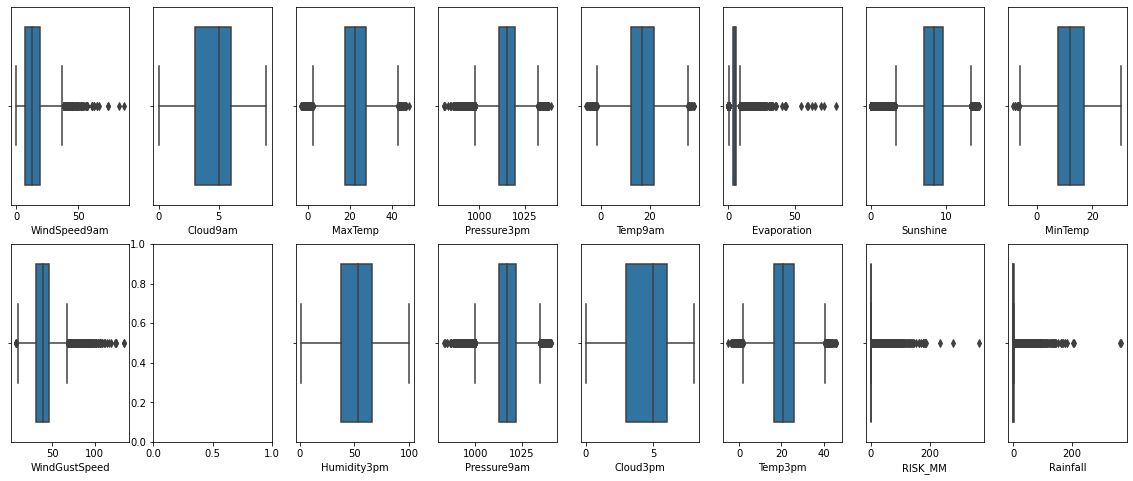

In [417]:
f,ax=plt.subplots(2,8,figsize=(20,8))
sns.boxplot('WindSpeed9am',data=df1,ax=ax[0,0])
sns.boxplot('Cloud9am',data=df1,ax=ax[0,1])
sns.boxplot('MaxTemp',data=df1,ax=ax[0,2])
sns.boxplot('Pressure3pm',data=df1,ax=ax[0,3])
sns.boxplot('Temp9am',data=df1,ax=ax[0,4])
sns.boxplot('Evaporation',data=df1,ax=ax[0,5])
sns.boxplot('Sunshine',data=df1,ax=ax[0,6])
sns.boxplot('MinTemp',data=df1,ax=ax[0,7])
sns.boxplot('WindGustSpeed',data=df1,ax=ax[1,0])
sns.boxplot('Humidity3pm',data=df1,ax=ax[1,2])
sns.boxplot('Pressure9am',data=df1,ax=ax[1,3])
sns.boxplot('Cloud3pm',data=df1,ax=ax[1,4])
sns.boxplot('Temp3pm',data=df1,ax=ax[1,5])
sns.boxplot('RISK_MM',data=df1,ax=ax[1,6])
sns.boxplot('Rainfall',data=df1,ax=ax[1,7])




{'whiskers': [<matplotlib.lines.Line2D at 0x29df0fa8820>,
 'caps': [<matplotlib.lines.Line2D at 0x29df0fa8ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29df0fa84c0>],
 'medians': [<matplotlib.lines.Line2D at 0x29df0fb35e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29df0fb3940>],
 'means': []}

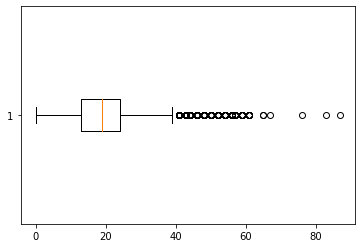

In [418]:
plt.boxplot(df1['WindSpeed3pm'],vert=False)

In [419]:
df1.shape

(36261, 23)

There are many outliers in the data.
Cloud9am and Cloud3pm are negatively skewed, others are mostly positively skewed.

<AxesSubplot:>

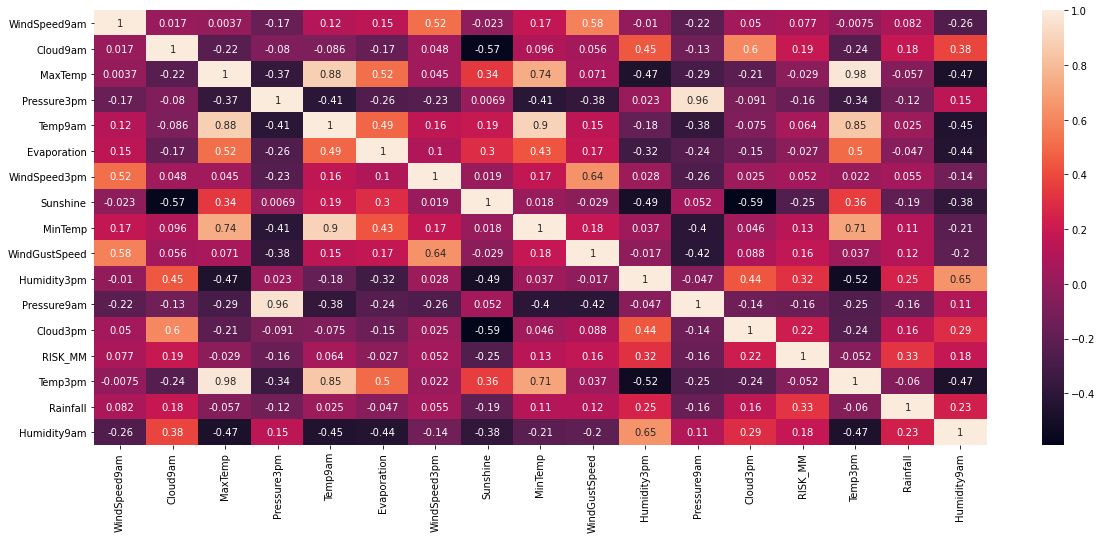

In [420]:
plt.subplots(figsize=(20,8))
sns.heatmap(df1[['WindSpeed9am',
 'Cloud9am',
 'MaxTemp',
 'Pressure3pm',
 'Temp9am',
 'Evaporation',
 'WindSpeed3pm',
 'Sunshine',
 'MinTemp',
 'WindGustSpeed',
 'Humidity3pm',
 'Pressure9am',
 'Cloud3pm',
 'RISK_MM',
 'Temp3pm',
 'Rainfall',
 'Humidity9am']].corr(),annot=True)

In [421]:
cor_matrix = df1.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.60)]
print(); print(to_drop)


['MaxTemp', 'WindSpeed3pm', 'Humidity3pm', 'Pressure3pm', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [422]:
df1.drop(df1[to_drop],axis=1,inplace=True)

array([[<AxesSubplot:title={'center':'MinTemp'}>]], dtype=object)

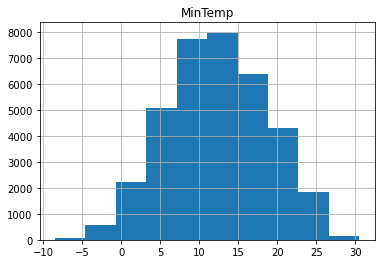

In [423]:
df1.hist('MinTemp')

2. Outlier removal

In [424]:
df_float=df1.select_dtypes('float')
df_float.head()

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,Humidity9am,Pressure9am,Cloud9am,RISK_MM
0,5.1,0.0,1.8,8.9,30.0,7.0,65.0,1023.1,1.0,0.0
1,1.1,0.4,4.6,8.4,50.0,7.0,99.0,1001.5,5.0,0.0
2,19.7,0.0,7.2,7.2,41.0,19.0,48.0,1020.9,6.0,0.2
3,16.6,0.0,9.0,11.3,54.0,28.0,50.0,1018.3,6.0,0.0
4,14.6,0.0,4.6,8.4,43.0,6.0,64.0,1020.3,5.0,0.4


In [425]:
df1.select_dtypes('object').head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,Hobart,NW,WSW,SSE,No
1,Launceston,SSW,E,SW,No
2,Williamtown,SSE,SSE,SSE,No
3,PerthAirport,SW,SSE,SW,No
4,GoldCoast,NNW,WNW,N,No


In [426]:
def outlier_removal(dataframe, dataframe2, limit = 1.5):
        
    for col in dataframe2:           # This is for the variables to be treated from upper right whisker
        rw = limit*(dataframe[col].quantile(0.75) - dataframe[col].quantile(0.25)) + dataframe[col].quantile(0.75)
        lw= dataframe[col].quantile(0.25)-(limit*(dataframe[col].quantile(0.75) - dataframe[col].quantile(0.25)))  
        dataframe = dataframe[~(dataframe[col]>rw)]
        dataframe = dataframe[~(dataframe[col]<lw)]
        dataframe = dataframe   
    
    return dataframe

In [427]:
df1.shape

(36261, 16)

In [428]:
df2 = outlier_removal(df1, df_float, limit = 1.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x29df008d190>,
 'caps': [<matplotlib.lines.Line2D at 0x29df008d850>,
 'boxes': [<matplotlib.lines.Line2D at 0x29df007edf0>],
 'medians': [<matplotlib.lines.Line2D at 0x29df008df10>],
 'fliers': [<matplotlib.lines.Line2D at 0x29df00982b0>],
 'means': []}

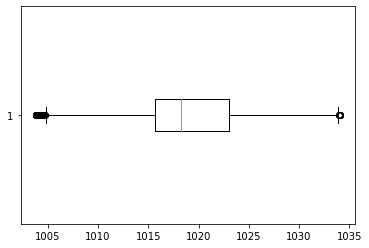

In [429]:
plt.boxplot(df2['Pressure9am'],vert=False)

In [430]:
df2.shape


(16458, 16)

# Label Encoding

In [431]:
df2.head()

,Date,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,Humidity9am,Pressure9am,Cloud9am,RainToday,RISK_MM
0,2009-05-18,Hobart,5.1,0.0,1.8,8.9,NW,30.0,WSW,SSE,7.0,65.0,1023.1,1.0,No,0.0
2,2010-02-18,Williamtown,19.7,0.0,7.2,7.2,SSE,41.0,SSE,SSE,19.0,48.0,1020.9,6.0,No,0.2
3,2010-03-04,PerthAirport,16.6,0.0,9.0,11.3,SW,54.0,SSE,SW,28.0,50.0,1018.3,6.0,No,0.0
4,2010-09-09,GoldCoast,14.6,0.0,4.6,8.4,NNW,43.0,WNW,N,6.0,64.0,1020.3,5.0,No,0.4
6,2011-10-13,Nuriootpa,9.8,0.0,4.4,10.5,SE,35.0,ENE,NNE,15.0,53.0,1017.8,3.0,No,0.2


# Train-Test Split

In [432]:
from sklearn.model_selection import train_test_split
df2=df2.drop('Date',axis=1)

X=df2.drop('RISK_MM',axis=1)
y=df2['RISK_MM']


In [433]:
X=pd.get_dummies(X)

In [434]:

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size= 0.30, random_state=42)

print(X_train.shape)
print(X_test.shape)


(11520, 105)
(4938, 105)


In [435]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())



                            OLS Regression Results                            
Dep. Variable:                RISK_MM   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     9.793
Date:                Thu, 26 May 2022   Prob (F-statistic):          2.47e-137
Time:                        12:18:53   Log-Likelihood:                 13129.
No. Observations:               11520   AIC:                        -2.606e+04
Df Residuals:                   11419   BIC:                        -2.531e+04
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
MinTemp               

In [436]:
y_pred=est2.predict(X_train)
rmse_train = mean_squared_error(y_train, y_pred, squared=False)

print(rmse_train)

0.07741415171105125


In [437]:
y_pred=est2.predict(X_test)


rmse_test = mean_squared_error(y_test, y_pred, squared=False)

print(rmse_test)

0.07965796356233536


In [438]:
X_train=X_train.drop(['MinTemp','Evaporation','WindSpeed9am','Pressure9am','Cloud9am','Location_Adelaide','Location_Albany','Location_Albury','Location_AliceSprings','Location_BadgerysCreek',
'Location_Cairns',
'Location_Canberra',
'Location_Cobar',
'Location_CoffsHarbour',
'Location_Dartmoor',
'Location_Darwin',
'Location_GoldCoast',
'Location_Hobart',
'Location_Launceston',
'Location_Melbourne',
'Location_Mildura',
'Location_Moree',
'Location_Richmond',
'Location_Sale',
'Location_SalmonGums',
'Location_Sydney',
'Location_SydneyAirport',
'Location_Townsville',
'Location_Tuggeranong',
'Location_WaggaWagga',
'Location_Walpole',
'Location_Watsonia',
'Location_Williamtown',
'Location_Witchcliffe',
'Location_Wollongong',
'Location_Woomera',
'WindGustDir_E',
'WindGustDir_ENE',
'WindGustDir_ESE',
'WindGustDir_N',
'WindGustDir_NE',
'WindGustDir_NNE',
'WindGustDir_NNW',
'WindGustDir_NW',
'WindGustDir_S',
'WindGustDir_SE',
'WindGustDir_SSE',
'WindGustDir_SSW',
'WindGustDir_SW',
'WindGustDir_W',
'WindGustDir_WNW',
'WindGustDir_WSW',
'WindDir9am_E',
'WindDir9am_ENE',
'WindDir9am_ESE',
'WindDir9am_N',
'WindDir9am_NE',
'WindDir9am_NNE',
'WindDir9am_NNW',
'WindDir9am_NW',
'WindDir9am_S',
'WindDir9am_SE',
'WindDir9am_SSE',
'WindDir9am_SSW',
'WindDir9am_SW',
'WindDir9am_W',
'WindDir9am_WNW',
'WindDir9am_WSW',
'WindDir3pm_E',
'WindDir3pm_ENE',
'WindDir3pm_ESE',
'WindDir3pm_N',
'WindDir3pm_NE',
'WindDir3pm_NNE',
'WindDir3pm_NNW',
'WindDir3pm_NW',
'WindDir3pm_S',
'WindDir3pm_SE',
'WindDir3pm_SSE',
'WindDir3pm_SSW',
'WindDir3pm_SW',
'WindDir3pm_W',
'WindDir3pm_WNW',
'WindDir3pm_WSW',
'RainToday_No',
'RainToday_Yes','Location_NorahHead','Location_Nuriootpa','Location_Perth','Location_PerthAirport','Location_PearceRAAF'],axis=1)


In [439]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                RISK_MM   R-squared (uncentered):                   0.146
Model:                            OLS   Adj. R-squared (uncentered):              0.145
Method:                 Least Squares   F-statistic:                              140.6
Date:                Thu, 26 May 2022   Prob (F-statistic):                        0.00
Time:                        12:19:32   Log-Likelihood:                          13046.
No. Observations:               11520   AIC:                                 -2.606e+04
Df Residuals:                   11506   BIC:                                 -2.596e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [440]:
y_pred=est2.predict(X_train)
rmse_train = mean_squared_error(y_train, y_pred, squared=False)

print(rmse_train)

0.07797422917811164


In [442]:
X_test=X_test.drop(['MinTemp','Evaporation','WindSpeed9am','Pressure9am','Cloud9am','Location_Adelaide','Location_Albany','Location_Albury','Location_AliceSprings','Location_BadgerysCreek',
'Location_Cairns',
'Location_Canberra',
'Location_Cobar',
'Location_CoffsHarbour',
'Location_Dartmoor',
'Location_Darwin',
'Location_GoldCoast',
'Location_Hobart',
'Location_Launceston',
'Location_Melbourne',
'Location_Mildura',
'Location_Moree',
'Location_Richmond',
'Location_Sale',
'Location_SalmonGums',
'Location_Sydney',
'Location_SydneyAirport',
'Location_Townsville',
'Location_Tuggeranong',
'Location_WaggaWagga',
'Location_Walpole',
'Location_Watsonia',
'Location_Williamtown',
'Location_Witchcliffe',
'Location_Wollongong',
'Location_Woomera',
'WindGustDir_E',
'WindGustDir_ENE',
'WindGustDir_ESE',
'WindGustDir_N',
'WindGustDir_NE',
'WindGustDir_NNE',
'WindGustDir_NNW',
'WindGustDir_NW',
'WindGustDir_S',
'WindGustDir_SE',
'WindGustDir_SSE',
'WindGustDir_SSW',
'WindGustDir_SW',
'WindGustDir_W',
'WindGustDir_WNW',
'WindGustDir_WSW',
'WindDir9am_E',
'WindDir9am_ENE',
'WindDir9am_ESE',
'WindDir9am_N',
'WindDir9am_NE',
'WindDir9am_NNE',
'WindDir9am_NNW',
'WindDir9am_NW',
'WindDir9am_S',
'WindDir9am_SE',
'WindDir9am_SSE',
'WindDir9am_SSW',
'WindDir9am_SW',
'WindDir9am_W',
'WindDir9am_WNW',
'WindDir9am_WSW',
'WindDir3pm_E',
'WindDir3pm_ENE',
'WindDir3pm_ESE',
'WindDir3pm_N',
'WindDir3pm_NE',
'WindDir3pm_NNE',
'WindDir3pm_NNW',
'WindDir3pm_NW',
'WindDir3pm_S',
'WindDir3pm_SE',
'WindDir3pm_SSE',
'WindDir3pm_SSW',
'WindDir3pm_SW',
'WindDir3pm_W',
'WindDir3pm_WNW',
'WindDir3pm_WSW',
'RainToday_No',
'RainToday_Yes','Location_NorahHead','Location_Nuriootpa','Location_Perth','Location_PerthAirport','Location_PearceRAAF'],axis=1)


In [443]:
y_pred=est2.predict(X_test)


rmse_test = mean_squared_error(y_test, y_pred, squared=False)

print(rmse_test)

0.07964431527297114


In [343]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

In [344]:
y_pred=regressor.predict(X_train)
rmse_train = mean_squared_error(y_train, y_pred, squared=False)

print(rmse_train)

0.030010465477803706


In [345]:
y_pred=regressor.predict(X_test)


rmse_test = mean_squared_error(y_test, y_pred, squared=False)

print(rmse_test)

0.08121486560040407
